In [3]:
import numpy as np
import pandas as pd
from os import listdir
import matplotlib.pyplot as plt
from functools import partial
rcParams = {'font.size': 24 , 'font.weight': 'normal', 'font.family': 'sans-serif',
            'axes.unicode_minus':False, 'axes.labelweight':'normal'}

plt.rcParams.update(rcParams)

def Get_Entropy(labels):
    counts_dict = {}
    for label in labels:
        try:
            counts_dict[label] += label
        except KeyError:
            counts_dict[label] = label
    probs = []
    for c in counts_dict:
        probs.append(counts_dict[c]/np.sum(list(counts_dict.values())))
    n_classes = len(counts_dict)
    #/np.log(len(counts_dict.keys()))
    return -np.sum(probs * np.log2(probs))#/np.log2(n_classes)

def Get_NG_Statistics(vector, clust_thresh=0): 
    x = np.arange(0, 100, 0.5)
    vector = np.sort(vector)[::-1]
    vector = vector[vector > clust_thresh]
    temp = np.cumsum(vector)
    NG, cum = [], []
    norm = np.sum(vector)
    for i in x:
        try:
            NG.append(vector[np.where(temp <= norm*i/100)[0][-1]])
            cum.append(temp[np.where(temp <= norm*i/100)[0][-1]])
        except IndexError:
            pass
    return cum, NG

MS50
MS55
MS60
MS65


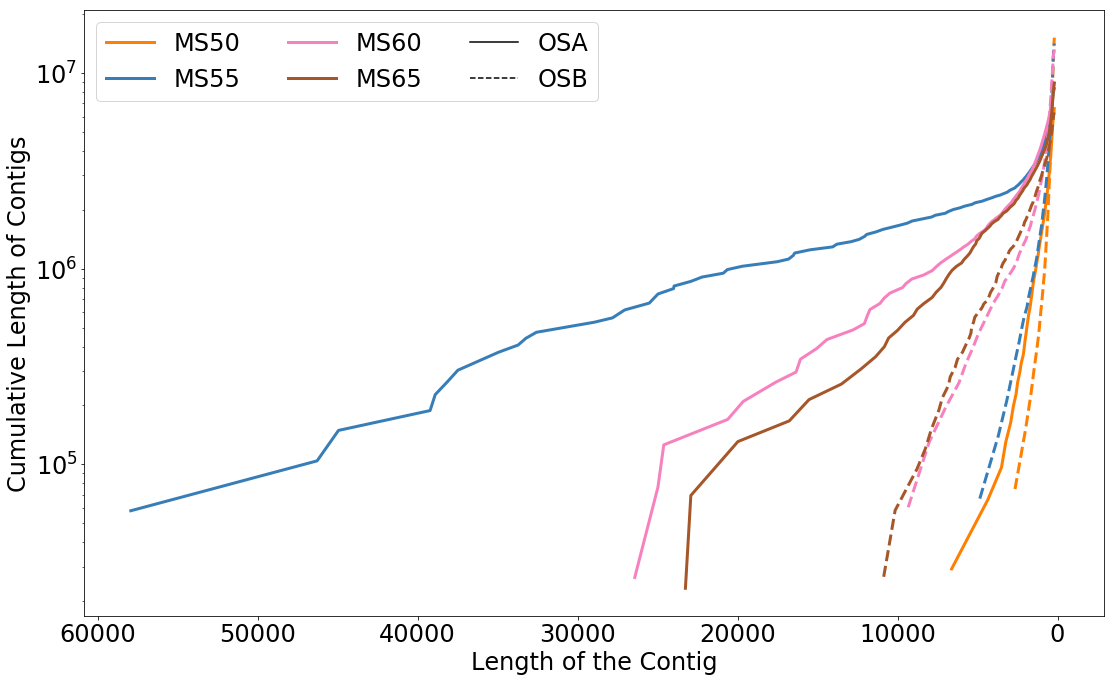

In [4]:
filepath = '/Users/harihara/Mount-2/Strain_Analysis/osa_osb_reassembly/'
op = []
fig, ax = plt.subplots(1,1,figsize=(16,10))
colors = ['#ff7f00','#377eb8','#f781bf', '#a65628', '#4daf4a']
ctr = 0

for s in ['MS50','MS55','MS60','MS65']:
    print(s)
    df_osa = pd.read_csv(filepath+s+'_megahit_assembled_contigs_osa_minct25/'+s+'_osa_minct25.contigs.fa.fai', sep = '\t',
                         names = ['Contig','Len','1','2','3'])
    del df_osa['1'], df_osa['2'], df_osa['3']
    OSA_Entropy = Get_Entropy(df_osa['Len'].tolist())
    osacum, osang = Get_NG_Statistics(df_osa['Len'])
    ax.plot(osang, osacum, color = colors[ctr], label = s, linewidth = 3)
    
    df_osb = pd.read_csv(filepath+s+'_megahit_assembled_contigs_osb_minct25/'+s+'_osb_minct25.contigs.fa.fai', sep = '\t',
                         names = ['Contig','Len','1','2','3'])
    osbcum, osbng = Get_NG_Statistics(df_osb['Len'])
    ax.plot(osbng, osbcum, color = colors[ctr],linestyle = '--', linewidth = 3)
    
    del df_osb['1'], df_osb['2'], df_osb['3']
    OSB_Entropy = Get_Entropy(df_osb['Len'].tolist())
    ctr += 1
    
    d = {'Sample':s, 'OSA Fragmentation':OSA_Entropy, 'OSB Fragmentation':OSB_Entropy}
    op.append(d)
ax.plot([0,0],[0,0], color = 'black',label = 'OSA')
ax.plot([0,0],[0,0], color = 'black',linestyle = '--', label = 'OSB')
ax.set_yscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
ax.legend(ncol = 3)
ax.set_xlabel('Length of the Contig')
ax.set_ylabel('Cumulative Length of Contigs')
fig.tight_layout()

fig.savefig('Research-Activities/Plots/Hot_Spring_Plots/OSA_OSB_Reassembly/Assembly-Stats-25.png')
df_fragmentation = pd.DataFrame(op)
df_fragmentation = df_fragmentation.set_index('Sample')



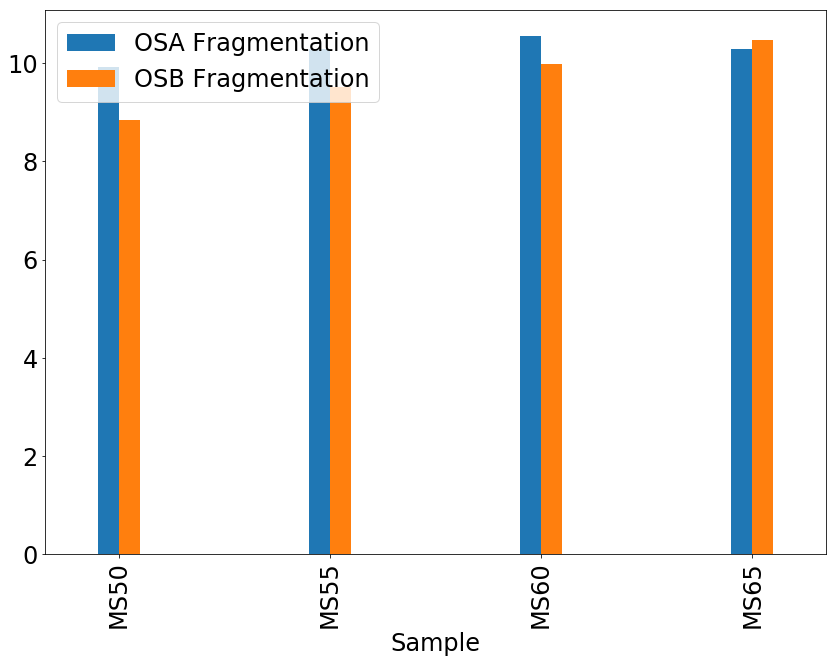

In [5]:
ax = df_fragmentation.plot(kind = 'bar', figsize = (14,10), width = 0.2)


1000000 #ff7f00
5000000 #377eb8
10000000 #f781bf
15000000 #a65628
20000000 #4daf4a
25000000 C9


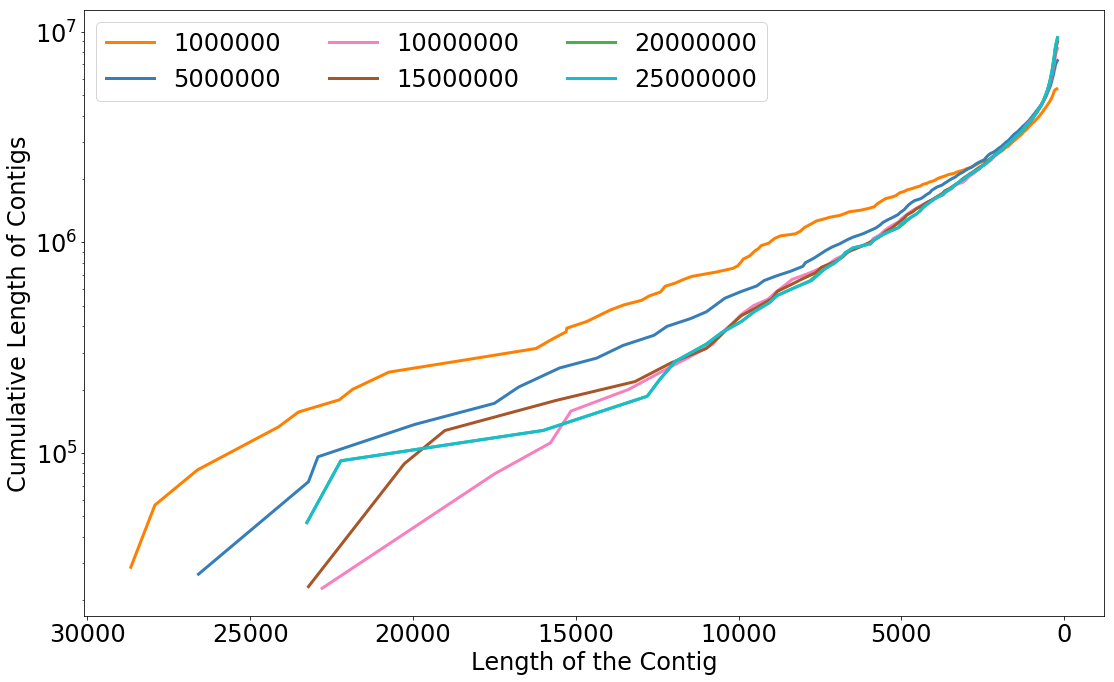

In [24]:
filepath = '/Users/harihara/Mount-2/Strain_Analysis/osa_osb_reassembly/'
fig, ax = plt.subplots(1,1,figsize=(16,10))
colors = ['#ff7f00','#377eb8','#f781bf', '#a65628', '#4daf4a', 'C9']
ctr = 0

for s in ['1000000','5000000','10000000','15000000','20000000', '25000000']:
    print(s, colors[ctr])
    df_osa = pd.read_csv(filepath+'MS65_megahit_assembled_contigs_osa_'+s+'/MS65_osa_'+s+'.contigs.fa.fai', 
                         sep = '\t',names = ['Contig','Len','1','2','3'])
    del df_osa['1'], df_osa['2'], df_osa['3']
    osacum, osang = Get_NG_Statistics(df_osa['Len'])
    ax.plot(osang, osacum, color = colors[ctr], label = s, linewidth = 3)
    ctr += 1
ax.set_yscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
ax.legend(ncol = 3)
ax.set_xlabel('Length of the Contig')
ax.set_ylabel('Cumulative Length of Contigs')
fig.tight_layout()

fig.savefig('Research-Activities/Plots/Hot_Spring_Plots/OSA_OSB_Reassembly/Assembly-Stats-Subsample.png')